### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

In [6]:
from VMSfunctions.Noise import *

In [7]:
set_log_level_info()

Load densities trained on 19 beer data (see [loader_kde](loader_kde.ipynb)).

In [8]:
base_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\'

In [9]:
base_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\'

In [10]:
ps = load_obj(os.path.join(base_dir, 'Trained Models\\peak_sampler_19_beers_fullscan.p'))

Load chromatogram data exported from R

In [11]:
cc = ChromatogramCreator(os.path.join(base_dir, 'Trained Models\\chromatogram_19_beers.csv.gz'))

INFO:ChromatogramCreator:Loading 0 chromatograms
INFO:ChromatogramCreator:Loading 5000 chromatograms
INFO:ChromatogramCreator:Loading 10000 chromatograms
INFO:ChromatogramCreator:Loading 15000 chromatograms
INFO:ChromatogramCreator:Loading 20000 chromatograms
INFO:ChromatogramCreator:Loading 25000 chromatograms
INFO:ChromatogramCreator:Loading 30000 chromatograms
INFO:ChromatogramCreator:Loading 35000 chromatograms
INFO:ChromatogramCreator:Loading 40000 chromatograms
INFO:ChromatogramCreator:Loading 45000 chromatograms
INFO:ChromatogramCreator:Loading 50000 chromatograms
INFO:ChromatogramCreator:Loading 55000 chromatograms
INFO:ChromatogramCreator:Loading 60000 chromatograms
INFO:ChromatogramCreator:Loading 65000 chromatograms
INFO:ChromatogramCreator:Loading 70000 chromatograms
INFO:ChromatogramCreator:Loading 75000 chromatograms
INFO:ChromatogramCreator:Loading 80000 chromatograms
INFO:ChromatogramCreator:Loading 85000 chromatograms
INFO:ChromatogramCreator:Loading 90000 chromatogram

### Generate some chemicals

In [44]:
hmdb = load_obj(os.path.join(base_dir, 'Trained Models\\hmdb_compounds.p'))

In [45]:
min_ms1_intensity = 2.5E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1050)]
n_ms1_peaks = 5000

# alpha = 0.1
# compound_list = hmdb
# chemical_type = 'Known'

alpha = math.inf
compound_list = hmdb
chemical_type = 'Unknown'

ms_levels = 1
chemicals = ChemicalCreator(ps)
dataset = chemicals.sample(cc, mz_range, rt_range, min_ms1_intensity, n_ms1_peaks, ms_levels=ms_levels, chemical_type=chemical_type,
               formula_list=None, compound_list=compound_list, alpha=alpha, fixed_mz=False)

UnknownChemical mz=163.7482 rt=941.96 max_intensity=409584.41
[ 39727.61  38206.03  28088.89  32280.47  24622.97  84202.52  31956.96
  34846.82  66918.38  78124.34  24473.    81004.62  76408.62  66807.97
  79363.69  37002.62  96539.25  36469.95  96586.65 118441.9   35822.02
 129462.6   85300.58 115312.   146606.3  180315.3  167870.4   37293.73
  48001.52 138958.5  140467.4  100699.5  104308.4  120876.5  146455.5
  73557.56  32453.37 125426.6  159548.3   70405.14 152708.9   66376.02
  51493.98 124591.3   51547.06 118433.6  151912.1  133478.7  118095.3
 120384.1  101964.4  170871.7  161490.   146640.7  160235.7  212872.9
 139460.8  255899.6  199739.7  102346.   204318.6  333630.3  299923.3
 392242.6  273666.4  409586.5  350143.1  350236.8  316221.8  361197.3
 300590.7  259045.4  285104.3  348681.2  303256.9  220862.7  274498.3
 229549.5  286575.3  144251.8  107984.8  108082.1  112350.2  102246.7
  41416.11  48434.64  29193.6 ]


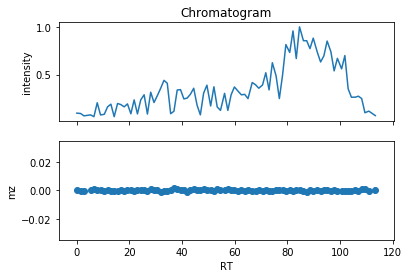

UnknownChemical mz=263.9130 rt=439.04 max_intensity=775722.74
[209246.   129919.6  180899.7  157489.8  129582.5  111140.8  128397.5
 115732.1  156933.7  144210.8  130489.6  141107.8  103554.3  162462.8
 103079.6  118634.4  150257.4  100230.4  108647.7  113244.5  137963.4
 145357.   204980.2  428166.4  336868.8  473021.2  578184.6  729232.8
 573371.4  343616.8  595461.3  702878.9  515631.4  367778.4  380987.3
 606182.9  556819.2  396854.3  413689.8  442426.1  377051.1  775718.4
 589706.8  582558.8  630541.4  579423.4  405608.4  558518.   589089.8
 258254.9  312318.9  333248.2  227586.9  202512.5   97468.13 381622.5
 120183.4  285466.   282654.4  179665.7   93314.7  209700.8  292768.
 373250.1  342000.2  449924.3  390418.7  354130.8  244595.4  323447.3
 232322.   204480.4  207502.8  181473.4  187704.8   93632.46  71764.48
 142364.1  157918.5  194053.6  202201.9  212595.8  185262.   167808.5
 245947.9   82435.41 136271.5  158515.5  129308.1  115117.4   42163.14
  62106.56  40500.94  57548

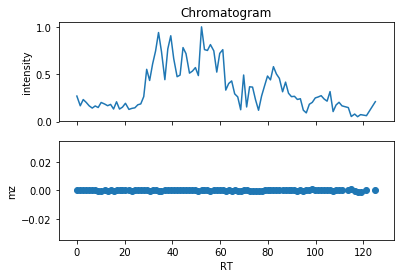

UnknownChemical mz=220.0709 rt=294.89 max_intensity=427284.59
[204868.2 142219.2 336935.7 344862.9 427285.4 349618.  325726.1 321865.1
 386646.5 270391.4 185901.7 220669.1]


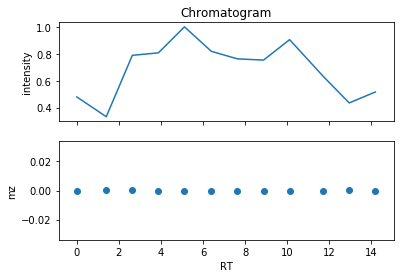

UnknownChemical mz=355.8288 rt=1002.19 max_intensity=267231.17
[256431.   228520.4  224031.3  228000.1  207087.4  267228.4  111070.4
  85113.67]


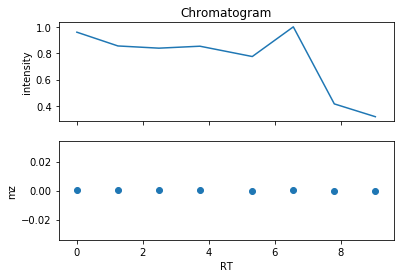

UnknownChemical mz=336.2565 rt=379.96 max_intensity=1167453.33
[ 168545.7   185451.9   448761.    533249.2  1167468.   1129644.
  637591.8   184084.8   101007.1    71231.23]


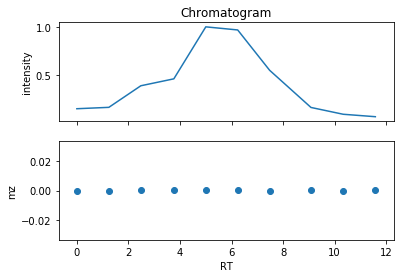

UnknownChemical mz=737.8424 rt=928.15 max_intensity=501557.36
[ 11585.08  67074.16 164916.9  195838.1  321088.5  477157.6  501596.4
 423343.8  336320.5  302601.9  178602.6  138264.9   50081.06  33398.  ]


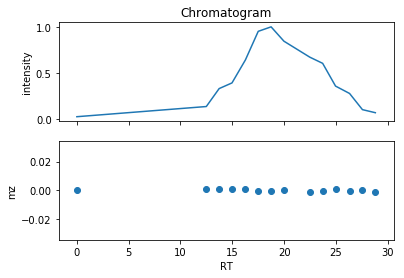

UnknownChemical mz=145.0632 rt=235.72 max_intensity=707600.05
[120259.2  159945.9  165737.3  191089.5  153188.6   93234.77 299765.2
 226048.3  190647.1  388319.8  336650.1  377928.8  447143.2  498253.9
 430462.5  707610.9  560300.8  667717.8  621949.1  601029.1  350335.3
 491692.7  185569.7  270197.6  154765.5 ]


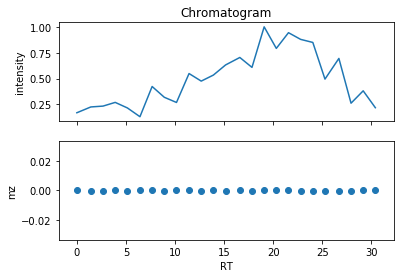

UnknownChemical mz=193.2608 rt=1068.77 max_intensity=1623769.78
[ 278542.1  243525.1  338750.7 1277665.  1075697.  1359894.  1623789.
 1146344.  1038530.  1146169.  1306445.   677196.4 1227957.  1109267.
 1285731. ]


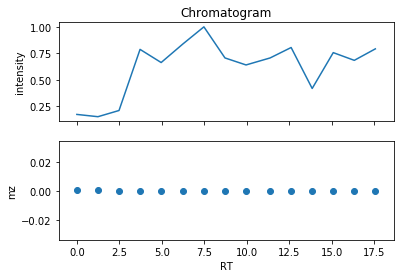

UnknownChemical mz=123.0777 rt=842.34 max_intensity=1165202.18
[ 763649.2  846456.8  962967.7  690074.7  934145.3 1165197.  1027546.
  992480.4  964309.8  772124.   697803.6]


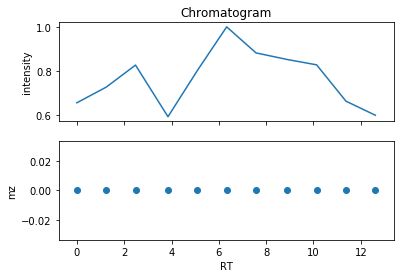

UnknownChemical mz=307.8945 rt=889.18 max_intensity=2554532.17
[1926579.  2011070.  1934515.  2215666.  2554524.  1492036.   687794.1
  512776.7]


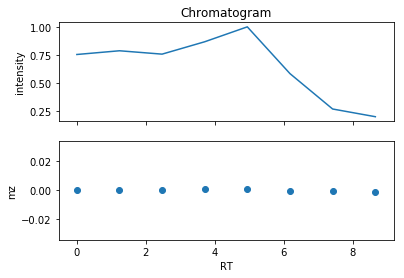

In [46]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in dataset[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

In [47]:
type(dataset[0])

VMSfunctions.Chemicals.UnknownChemical

### Set up a simple MS1 controller

In [48]:
set_log_level_warning() # We don't want to see too many messages as the controller is running

In [49]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = SimpleMs1Controller(mass_spec)
controller.make_plot = False
controller.run(rt_range[0][0], rt_range[0][1])

1080.8307052406888it [00:11, 94.24it/s]                                                                                                                                                                 


Print the peaks generated for each chemical

In [50]:
chem = controller.mass_spec.chemicals[0]
peaks = controller.mass_spec.chemicals_to_peaks[chem]
print(chem)
for i in range(len(peaks)):
    p = peaks[i]
    print(p)
    if i >= 3:
        break

UnknownChemical mz=163.7482 rt=941.96 max_intensity=409584.41
Peak mz=164.7554 rt=942.54 intensity=39113.31 ms_level=1
Peak mz=164.7552 rt=944.01 intensity=33213.29 ms_level=1
Peak mz=164.7552 rt=945.24 intensity=29077.32 ms_level=1
Peak mz=164.7554 rt=946.50 intensity=31188.12 ms_level=1


In [51]:
all_peaks = []
for chem in controller.mass_spec.chemicals_to_peaks:
    all_peaks.extend(controller.mass_spec.chemicals_to_peaks[chem])
mzs = np.array([p.mz for p in all_peaks])
rts = np.array([p.rt for p in all_peaks])
intensities = np.array([p.intensity for p in all_peaks])
scans = controller.scans[1]
scan_times = [scan.rt for scan in scans]
scan_durations = [j-i for i, j in zip(scan_times[:-1], scan_times[1:])] # https://stackoverflow.com/questions/2400840/finding-differences-between-elements-of-a-list

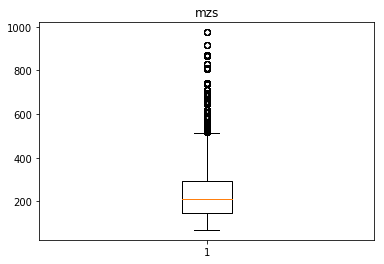

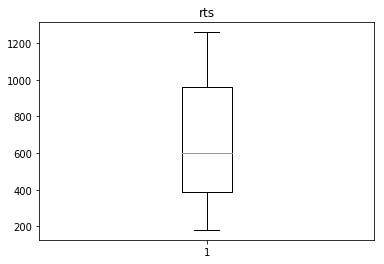

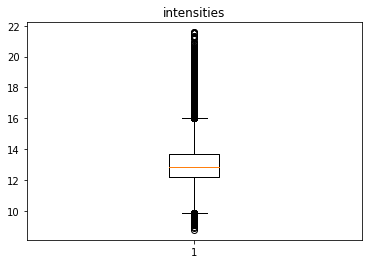

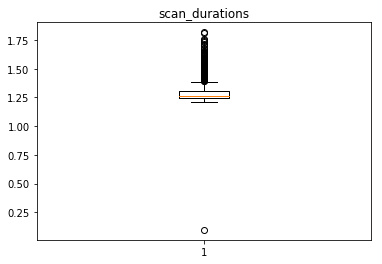

In [52]:
_ = plt.boxplot(mzs)
plt.title('mzs')
plt.show()

_ = plt.boxplot(rts)
plt.title('rts')
plt.show()

_ = plt.boxplot(np.log(intensities))
plt.title('intensities')
plt.show()

_ = plt.boxplot(scan_durations)
plt.title('scan_durations')
plt.show()

Save to mzML file

In [53]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\B. CentWave\\mzML\\no_noise_ms1_controller.mzML'))
# run R script

In [54]:
save_obj(controller, os.path.join(base_dir, 'Manuscript\\B. CentWave\\no_noise_ms1_controller.p'))

### With Noise

In [55]:
set_log_level_debug()

In [56]:
mzml_path = base_dir + 'Data\\multibeers_urine_data\\beers\\fullscan\\'
xcms_roi_file = mzml_path + 'rois.csv'
extracted_roi_file = base_dir + 'Trained Models\\rois_19_beers.p'

In [57]:
ds = DataSource()
ds.load_data(mzml_path)
ds.load_roi(extracted_roi_file)

C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_10_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_10_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_11_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_11_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_12_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_12_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_13_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_13_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_14_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_14_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_15_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_15_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_16_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_16_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_17_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_17_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_18_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_18_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_19_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_19_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_1_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_1_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_2_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_2_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_3_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_3_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_4_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_4_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_5_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_5_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_6_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_6_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_7_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_7_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_8_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_8_fullscan1.mzML


C:\Users\joewa\University of Glasgow\Vinny Davies - CLDS Metabolomics Project\Data\multibeers_urine_data\beers\fullscan\Beer_multibeers_9_fullscan1.mzML


INFO:DataSource:Loading Beer_multibeers_9_fullscan1.mzML


In [58]:
rtcc = RoiToChemicalCreator(ps, ds)

DEBUG:RoiToChemicalCreator:     0/499315
DEBUG:RoiToChemicalCreator: 50000/499315
DEBUG:RoiToChemicalCreator:100000/499315
DEBUG:RoiToChemicalCreator:150000/499315
DEBUG:RoiToChemicalCreator:200000/499315
DEBUG:RoiToChemicalCreator:250000/499315
DEBUG:RoiToChemicalCreator:300000/499315
DEBUG:RoiToChemicalCreator:350000/499315
DEBUG:RoiToChemicalCreator:400000/499315
DEBUG:RoiToChemicalCreator:450000/499315
INFO:RoiToChemicalCreator:Found 498711 ROIs above thresholds


In [59]:
len(rtcc.chemicals)

498711

In [60]:
def plot_chems(chem_list, N=10):
    for c in chem_list[0:N]:
        chrom = c.chromatogram
        plt.plot(chrom.raw_rts, chrom.raw_intensities)
        plt.show()

In [61]:
sorted_chems = sorted(rtcc.chemicals, key = lambda chem: chem.chromatogram.roi.num_scans())

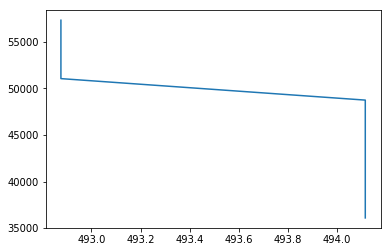

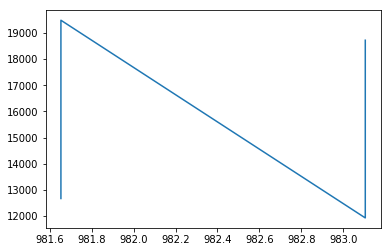

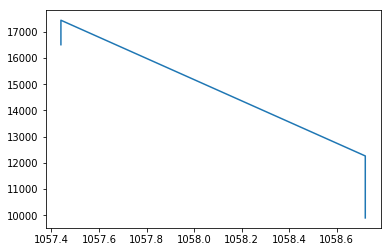

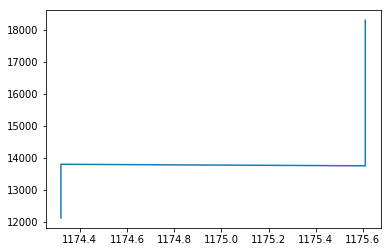

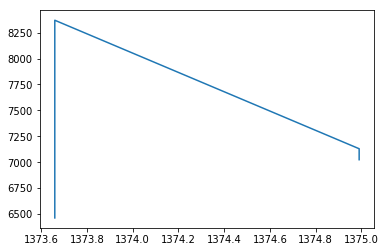

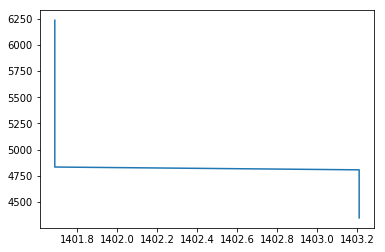

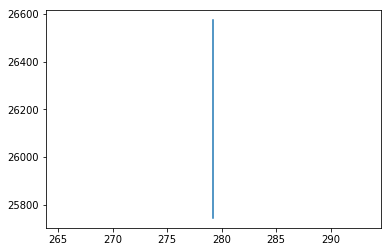

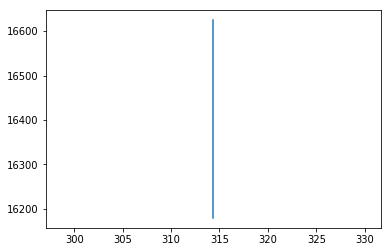

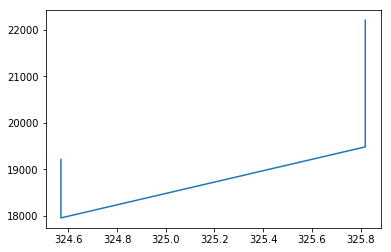

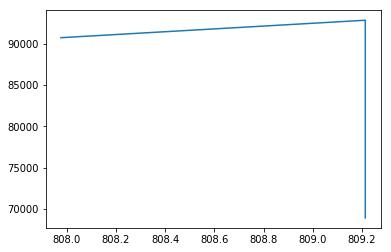

In [62]:
plot_chems(sorted_chems[0:10])

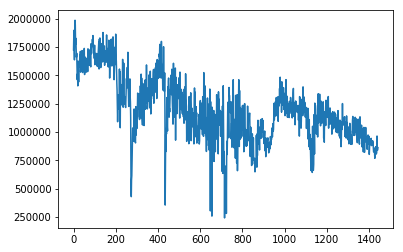

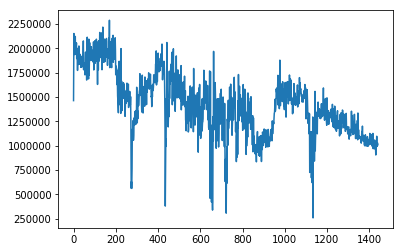

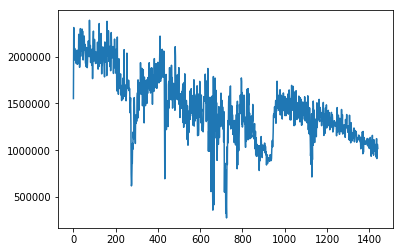

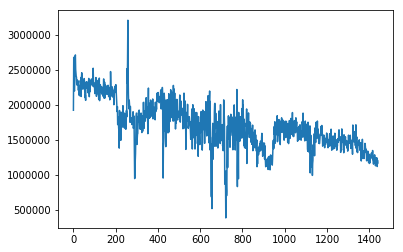

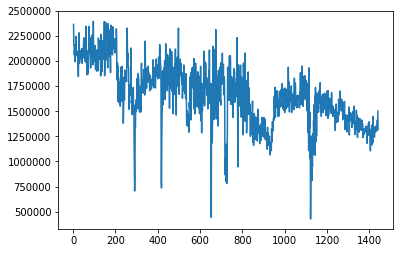

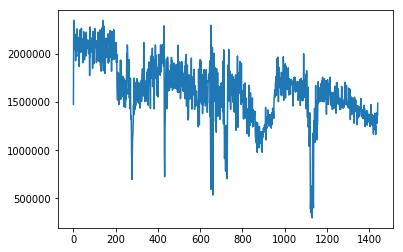

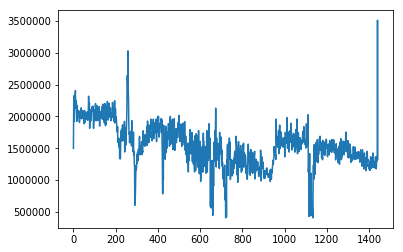

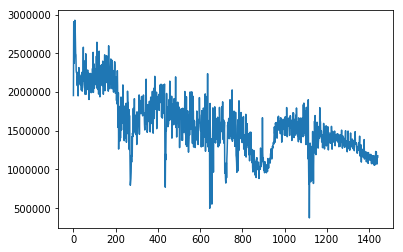

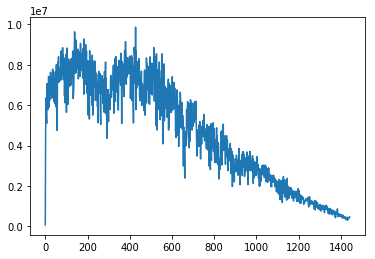

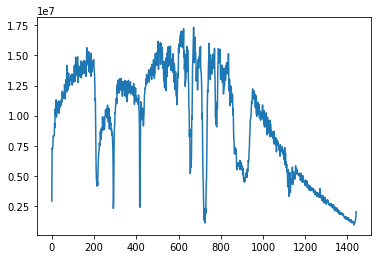

In [63]:
plot_chems(sorted_chems[-10:])

In [64]:
biggest = sorted_chems[-100000:]

In [65]:
selected = np.random.choice(sorted_chems, size=20000, replace=False).tolist()

#### Add non-peaks regions of interest to the data

In [66]:
for chem in dataset:
    chem.type = 'data'
for noise in selected:
    noise.type = 'noise'

In [67]:
noisy_dataset = dataset + selected

In [68]:
# shuffle(noisy_dataset)

In [69]:
len(dataset)

5000

In [70]:
len(noisy_dataset)

25000

#### Set up a simple MS1 controller

In [71]:
set_log_level_warning() # We don't want to see too many messages as the controller is running

In [72]:
mass_spec = IndependentMassSpectrometer(POSITIVE, noisy_dataset, density=ps.density_estimator)
controller = SimpleMs1Controller(mass_spec)
controller.make_plot = False
controller.run(rt_range[0][0], rt_range[0][1])

1080.5195076514815it [00:49, 21.67it/s]                                                                                                                                                                 


In [73]:
all_peaks = []
for chem in controller.mass_spec.chemicals_to_peaks:
    all_peaks.extend(controller.mass_spec.chemicals_to_peaks[chem])
mzs = np.array([p.mz for p in all_peaks])
rts = np.array([p.rt for p in all_peaks])
intensities = np.array([p.intensity for p in all_peaks])
scans = controller.scans[1]
scan_times = [scan.rt for scan in scans]
scan_durations = [j-i for i, j in zip(scan_times[:-1], scan_times[1:])] # https://stackoverflow.com/questions/2400840/finding-differences-between-elements-of-a-list

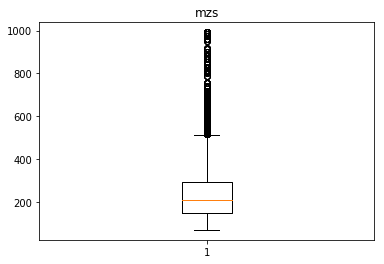

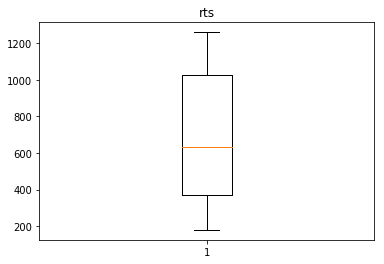

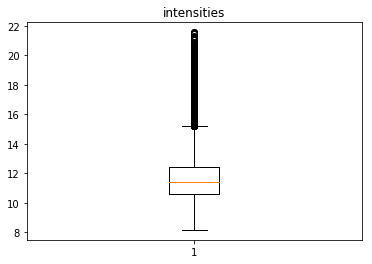

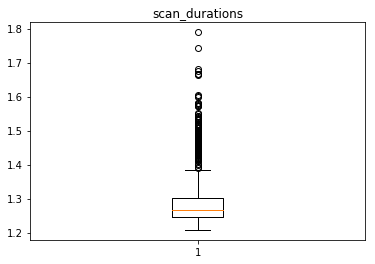

In [74]:
_ = plt.boxplot(mzs)
plt.title('mzs')
plt.show()

_ = plt.boxplot(rts)
plt.title('rts')
plt.show()

_ = plt.boxplot(np.log(intensities))
plt.title('intensities')
plt.show()

_ = plt.boxplot(scan_durations)
plt.title('scan_durations')
plt.show()

In [75]:
np.median(rts)

634.1469290659237

In [76]:
np.min(np.log(intensities)), np.max(np.log(intensities))

(8.15125606126582, 21.572313286972374)

Save to mzML file

In [77]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\B. CentWave\\mzML\\noisy_ms1_controller.mzML'))
# run R script

In [78]:
save_obj(controller, os.path.join(base_dir, 'Manuscript\\B. CentWave\\noisy_ms1_controller.p'))

### Set up a Top-N controller

We can run the dataset through a top-N DDA controller

In [ ]:
# set_log_level_warning()
# set_log_level_info()
set_log_level_debug()

In [ ]:
ps = load_obj(os.path.join(base_dir, 'Trained Models\\peak_sampler_19_beers_fragmentation.p'))

In [ ]:
min_ms1_intensity = 2.5E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1050)]
n_ms1_peaks = 1000

# alpha = 0.1
# compound_list = hmdb
# chemical_type = 'Known'

alpha = math.inf
compound_list = None
chemical_type = 'Unknown'
ms_levels = 2

chemicals = ChemicalCreator(ps)
dataset = chemicals.sample(cc, mz_range, rt_range, min_ms1_intensity, n_ms1_peaks, ms_levels=ms_levels, 
                           chemical_type=chemical_type, formula_list=None, compound_list=compound_list, alpha=alpha, fixed_mz=False)

In [ ]:
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window (Dalton) around a selected precursor ion
rt_tol = 15                     # the rt window (second) around a selected precursor ion to prevent it from fragmented multiple times
min_ms1_intensity = 2.5E5       # the minimum ms1 peak intensity to be fragmented

In [ ]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms1_intensity)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

In [ ]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\B. CentWave\\no_noise_top_N_controller.mzML'))

### Set up a DIA controller

We can run the dataset through a DIA controller

In [ ]:
dia_design = "basic"
window_type = "even"
kaufmann_design = None
extra_bins = 0
num_windows = 10

In [ ]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TreeController(mass_spec, dia_design, window_type, kaufmann_design, extra_bins, num_windows)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

In [ ]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'Manuscript\\B. CentWave\\no_noise_dia_controller.mzML'))